Exercise Sheet 7 **Stochastic Optimization**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(43222)
plt.rc('figure', figsize=(20.0, 8.0))

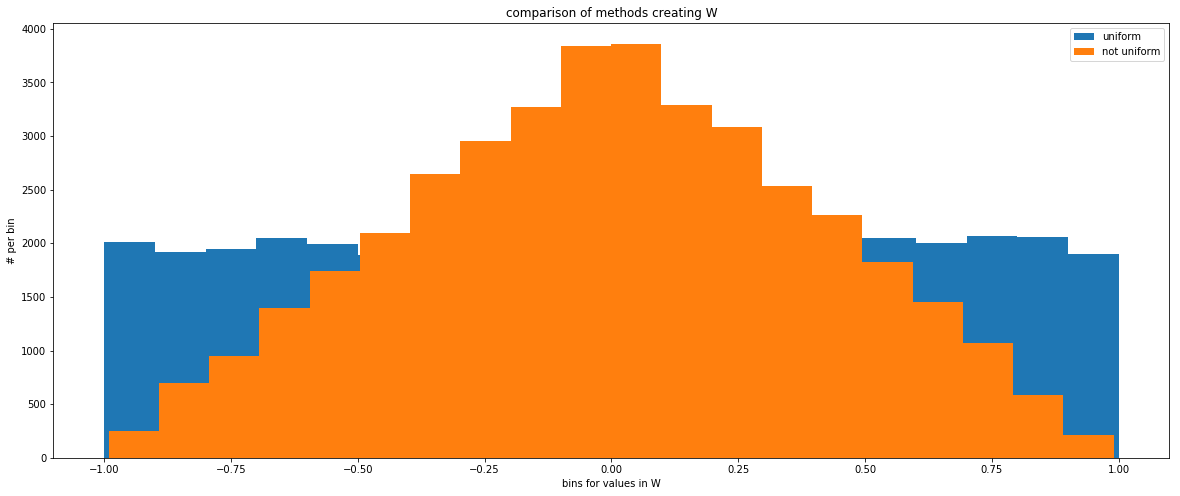

In [3]:
def make_W(N=6):
    W = np.random.uniform(high=1,low=-1,size=(N,N))
    i_lower = np.tril_indices(N,-1)
    W[i_lower] = W.T[i_lower]
    np.fill_diagonal(W,0)
    return W

def make_W_not_quite_uniform(N=6):
    W = np.random.uniform(high=1,low=-1,size=(N,N))
    W = (W+W.T)/2
    np.fill_diagonal(W,0)
    return W

W_uni = make_W(200).flatten()
W_not_uni = make_W_not_quite_uniform(200).flatten()
plt.hist(W_uni,bins=20,label="uniform")
plt.hist(W_not_uni,bins=20,label="not uniform")
plt.title("comparison of methods creating W")
plt.xlabel("bins for values in W")
plt.ylabel("# per bin")
plt.legend()
plt.show()

**7.1 Simulated Annealing**

In [4]:
def make_s(N=6):
    return np.random.choice([-1,1],size=N)

def E(s,W):
    return -s.T@W@s/2

def E_si(i,s,W):
    return -s[i]*W[i]@s

def P_s(s,Z,beta,W):
    return np.exp(-beta*E(s,W))/Z
    
def sim_annealing(W,s,tmax=500,M=1,N=6,beta=0.00001,tau=1.03):
    T_t = []
    E_s = []
    for t in range(tmax):
        T_t.append(1/beta)
        E_s.append(E(s,W))
        for m1 in range(M):
            for m2 in range(M):
                i = np.random.randint(0,high=6)
                delta_E = -2*E_si(i,s,W)
                P = 1/(1+np.exp(beta*delta_E))
                s[i] *= np.random.choice([-1,1],p=[P,1-P])
            beta *= tau
    return (T_t, E_s)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


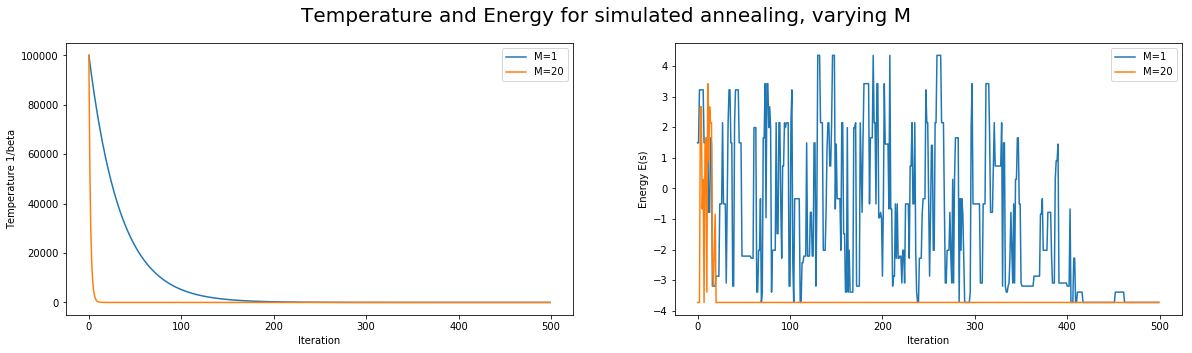

In [5]:
s = make_s()
W = make_W()

Mvals = [1,20]

fig,ax = plt.subplots(1,2, figsize=(20,5))
for m in Mvals:
    T_t, E_s = sim_annealing(W,s,M=m)
    ax[0].plot(T_t,label=f"M={m}")
    ax[1].plot(E_s,label=f"M={m}")
ax[0].legend()
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Temperature 1/beta")
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Energy E(s)")
ax[1].legend()
fig.suptitle("Temperature and Energy for simulated annealing, varying M", fontsize = 20)
plt.show()

[]

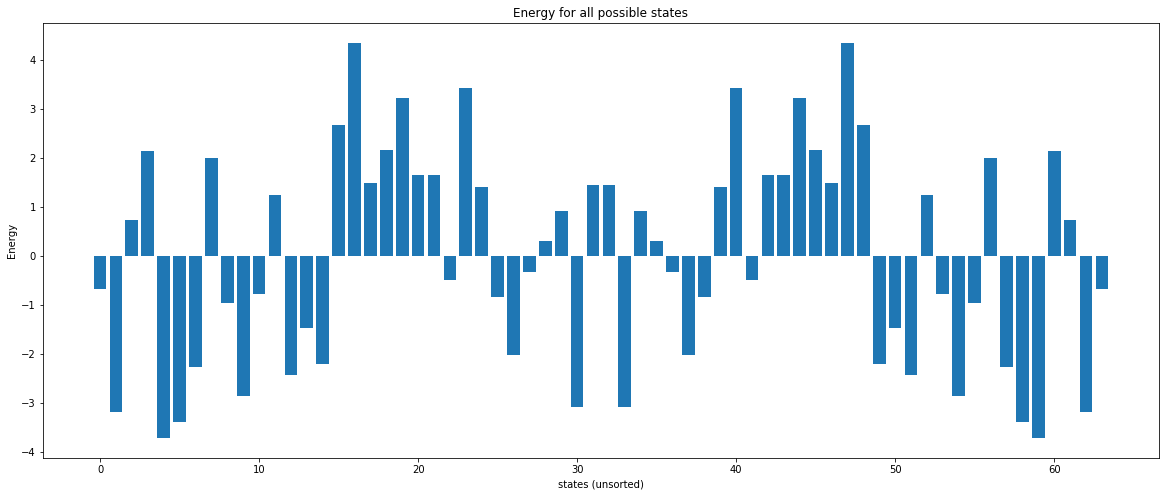

In [6]:
s_permutations = np.array(np.meshgrid([-1,1],[-1,1],[-1,1],[-1,1],[-1,1],[-1,1])).reshape(6,2**6).T

E_s_full = [E(s,W) for s in s_permutations]

plt.bar(range(64),E_s_full)
plt.xlabel("states (unsorted)")
plt.ylabel("Energy")
plt.title("Energy for all possible states")
plt.plot()

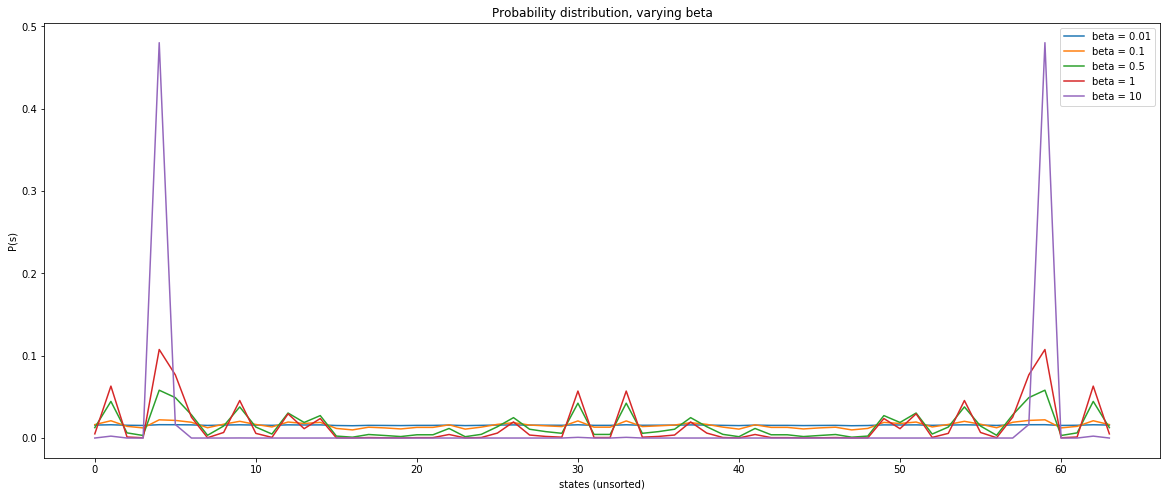

In [12]:
betas = [0.01,0.1,0.5,1,10]

for i,beta in enumerate(betas):
    Z = np.sum(np.exp(-beta*np.array(E_s_full)))
    P = [P_s(s,Z,beta,W) for s in s_permutations]
    plt.plot(range(64),P,label=f"beta = {beta}")
plt.legend()
plt.xlabel("states (unsorted)")
plt.ylabel("P(s)")
plt.title("Probability distribution, varying beta")
plt.show()

**7.2 Mean-Field Annealing**

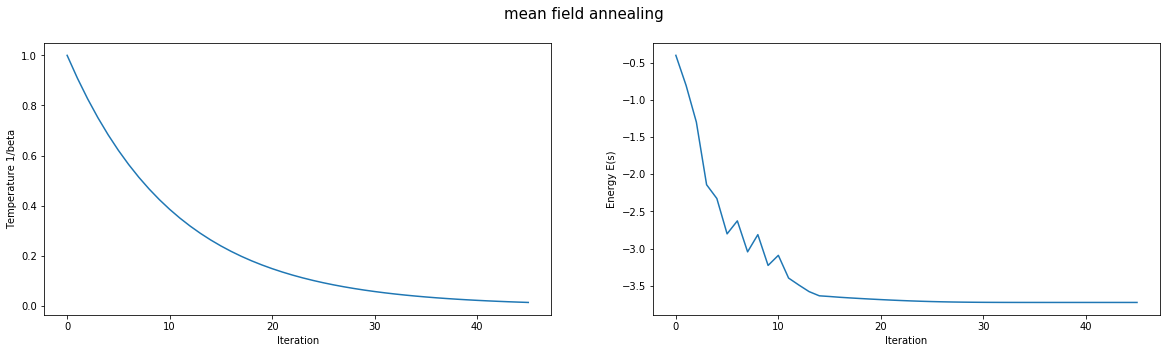

In [11]:
def Q_s(beta,e,s,Z_Q):
    return np.exp(-beta*e@s)/Z_Q

def e_func(s,W):
    return -W@s 

def mean_field_annealing(W,tmax=50,epsilon=0.00000001,N=6,beta=1,tau=1.1):
    s = np.random.rand(N)
    T_t = []
    E_s = []
    e_old = np.zeros((N))
    e_new = e_func(s,W)
    for t in range(tmax):
        T_t.append(1/beta)
        E_s.append(E(s,W))
        
        if np.linalg.norm(e_new-e_old)<epsilon:
            break
            
        s = np.tanh(-beta*e_new)
        e_old = e_new
        e_new = e_func(s,W)
        beta *= tau
    return (T_t, E_s)



fig,ax = plt.subplots(1,2, figsize=(20,5))
T_t, E_s = mean_field_annealing(W)
ax[0].plot(T_t)
ax[1].plot(E_s)
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Temperature 1/beta")
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Energy E(s)")
fig.suptitle("mean field annealing",fontsize=15)
plt.show()